# Day 2 exercises - Creating `plot_bsd`

Exercise 1. Using your function from Exercise 2 on Sheet 1, write a function which computes the **poor man's $L$-function**

$$f_E(x) = \prod_{p \leq x}\frac{N_p(E)}{p}$$

for a given elliptic curve $E/\mathbb{Q}$ and input $x \in \mathbb{R}$.

In [1]:
def pts(G,l):
    N = G.Np(l)
    return N
def PML(E,x):
    prod=1
    for p in Primes():
        if p <= x:
            prod = prod*pts(E,p)/p
        else:
            return prod
E= EllipticCurve([0,2]);E
PML(E,100)


93442649303294014480868966400/9981802802647926561870577337

Exercise 2. Create a scatter plot of $f_E(x)$ for various elliptic curves $E$. What patterns can you observe? 

In [42]:
import matplotlib.pyplot as plt


In [13]:
E1 = EllipticCurve([1,2,3,4,5])
E2 = EllipticCurve([3,4,5,6,7])
E3 = EllipticCurve([5,6,7,8,9])


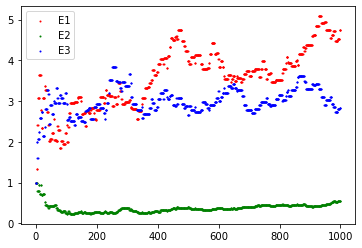

In [26]:
def scatter_plot_color(list, col ,lab):
  x = []
  y = []
  for i in list:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x,y,color = col,s=1,label = lab)

X1 = [[x,PML(E1,x)] for x in range(1000)]
X2 = [[x,PML(E2,x)] for x in range(1000)]
X3 = [[x,PML(E3,x)] for x in range(1000)]
scatter_plot_color(X1,'red','E1')
scatter_plot_color(X2,'green','E2')
scatter_plot_color(X3, 'blue','E3')
plt.legend(loc = 'upper left')
plt.show()


Exercise 3. Create a scatter plot of $\log(f_E(x))$ against $\log\log(x)$ for various elliptic curves $E$. Ensure that the plot includes other helpful user information such as the bound on $x$ used, the Elliptic curves plotted, and possibly suggestive lines of nearest fit.

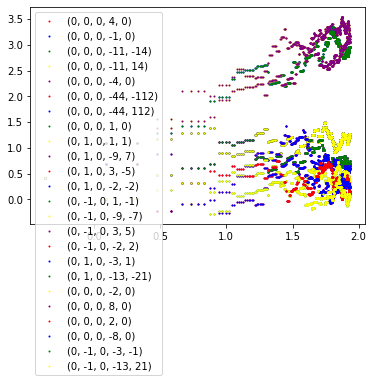

In [66]:
colour = ["red", "blue", "green", "yellow", "purple"]
def plot_bsd(ecs_list, B = 1000):
            for E in ecs_list:
                    X = [[ln(ln(x)), ln(PML(E,x))] for x in range(B)]
                    scatter_plot_color(X,colour[ecs_list.index(E)%5],str(E.ainvs()))
            plt.legend(loc = 'upper left')
            plt.xscale("linear")
            plt.yscale("linear")
            plt.show
                
    
E = [E1,E2,E3]
elist = EllipticCurves_with_good_reduction_outside_S([2])                          
plot_bsd(elist, 1000)                          
    
    
    
    
    
    

Exercise 4. Create a `plot_bsd` function which works for a list of elliptic curves over an arbitrary number field.

Exercise 5. Can you find an elliptic curve $E/\mathbb{Q}$, and four number fields $K_1, K_2, K_3, K_4$ for which the rank of $E(K_i)$ is different for each $i$. Create the BSD plot for these base-changed curves.

Exercise 6. Why is the **poor man's analytic rank** (the slope of $\log(f_E(x))$ against $\log\log(x)$) equal to the actual analytic rank (order of vanishing at $s=1$ of $L(E/\mathbb{Q},s))?